In [1]:
from Minesweeper import *
from MS_GUI import *
from MS_AI import *
import math
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

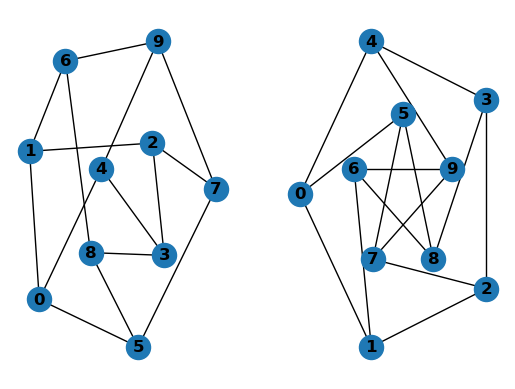

In [2]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

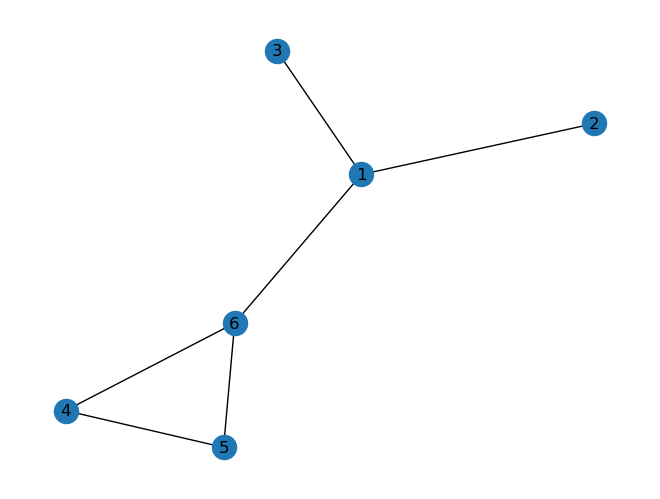

In [3]:
graph = nx.Graph()

graph.add_node(1, tile=MS_Tile(1))
graph.add_node(2, tile=MS_Tile(2))
graph.add_node(3, tile=MS_Tile(3))
graph.add_edge(1, 2)
graph.add_edge(1, 3)

graph.add_node(4, tile=MS_Tile(4))
graph.add_node(5, tile=MS_Tile(5))
graph.add_node(6, tile=MS_Tile(6))
graph.add_edge(4, 5)
graph.add_edge(4, 6)
graph.add_edge(6, 1)
graph.add_edge(5, 6)

nx.draw(graph, with_labels=True, pos=nx.spring_layout(graph))

In [4]:
graph.add_edge(4, 5, foo=[1,2])
for n in graph.edges:
    print(graph.edges[n])

{}
{}
{}
{'foo': [1, 2]}
{}
{}


In [5]:
import z3
from functools import reduce

In [6]:
a = z3.Bool('a')

In [7]:
def all_smt(s, initial_terms):
    def block_term(s, m, t):
        s.add(t != m.eval(t, model_completion=True))
    def fix_term(s, m, t):
        s.add(t == m.eval(t, model_completion=True))
    def all_smt_rec(terms):
        if z3.sat == s.check():
           m = s.model()
           yield m
           for i in range(len(terms)):
               s.push()
               block_term(s, m, terms[i])
               for j in range(i):
                   fix_term(s, m, terms[j])
               yield from all_smt_rec(terms[i:])
               s.pop()   
    yield from all_smt_rec(list(initial_terms))

In [17]:
vars = {i:z3.Bool(f"t{i}") for i in range(4)}

t1_cond = reduce(lambda x,y: z3.Xor(x, y), vars.values())
s = z3.Solver()
s.add(t1_cond)

In [18]:
print(t1_cond)
for m in all_smt(s, vars.values()):
    print(m)

Xor(Xor(Xor(t0, t1), t2), t3)
[t0 = False, t2 = False, t1 = False, t3 = True]
[t0 = True, t2 = False, t1 = False, t3 = False]
[t0 = True, t2 = True, t1 = True, t3 = False]
[t0 = True, t2 = False, t1 = True, t3 = True]
[t0 = True, t2 = True, t1 = False, t3 = True]
[t0 = False, t2 = False, t1 = True, t3 = False]
[t0 = False, t2 = True, t1 = True, t3 = True]
[t0 = False, t2 = True, t1 = False, t3 = False]


In [13]:
t1_cond

Xor(t0, t1)